# Secondary Dataset 
# Linear Regression and Price Analysis using Random Forest



In [37]:
# Load necessary libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from matplotlib import gridspec
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

sns.set()

In [38]:
# set this to either primary or secondary depending on the analysis you want to do
dataset = 'secondary'

data = pd.read_csv(f'../dataset/mapped_{dataset}.csv', sep=",")
transform = pd.read_csv(f'../dataset/transform_{dataset}.csv', sep=",")
data = data.drop(columns=['uuid'])

In [39]:
import statsmodels.api as sm

X = data.loc[:, ~data.columns.isin(['price'])]
y = data["price"]

model = sm.OLS(y, X)    # Describe model

result = model.fit()       # Fit model

print(result.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.491
Model:                            OLS   Adj. R-squared (uncentered):              0.491
Method:                 Least Squares   F-statistic:                              9177.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        03:18:39   Log-Likelihood:                     -2.9825e+05
No. Observations:              228637   AIC:                                  5.966e+05
Df Residuals:                  228613   BIC:                                  5.968e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [40]:
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
yt = transform["price"]

modelt = sm.OLS(yt, Xt)    # Describe model

resultt = modelt.fit()       # Fit model

print(resultt.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          2.491e+05
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        03:18:41   Log-Likelihood:                      4.6828e+05
No. Observations:              228637   AIC:                                 -9.365e+05
Df Residuals:                  228614   BIC:                                 -9.363e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [41]:
from sklearn.metrics import mean_squared_error

y_pred = result.predict(X)
mse = mean_squared_error(y, y_pred)

fstat, pvalue = sm.stats.linear_rainbow(result)
print(f' f stat: {fstat} | p value: {pvalue} | mse: {mse}')

 f stat: 1.1950485339398464 | p value: 2.298071537923439e-199 | mse: 0.7953874475264291


In [42]:
y_predt = resultt.predict(Xt)
mset = mean_squared_error(yt, y_predt)

fstatt, pvaluet = sm.stats.linear_rainbow(resultt)
print(f' f stat: {fstatt} | p value: {pvaluet} | mse: {mset}')

 f stat: 1.0778265802478366 | p value: 4.45116439314793e-37 | mse: 0.000973979138532694


---

# Polynomial Regression Prediction

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression model and use it based on selected feature and target
def prediction(feature, target):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
    
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, mse, r2

Mean Squared Error: 0.673744456724405
R-squared: 0.33012267116035476


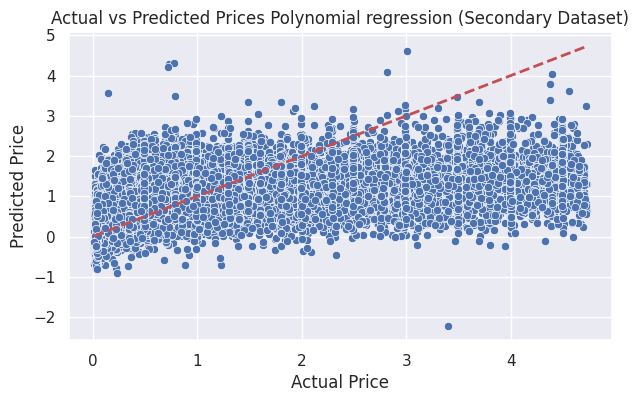

In [52]:
import statsmodels.api as sm
# Price Prediction based on Rank

X = data.loc[:, ~data.columns.isin(['price'])]
y = data["price"]

# Polinomial Linear Regression
y_test, y_pred, mse, r2 = prediction(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Ploting results

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Prices Polynomial regression (Secondary Dataset)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Mean Squared Error: 0.0002223750034004224
R-squared: 0.9447950218869814


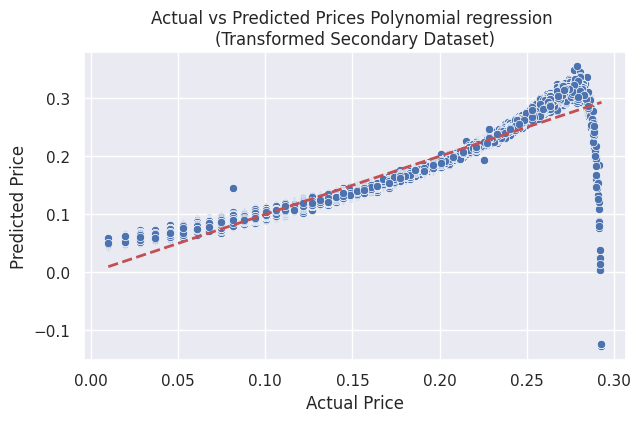

In [51]:
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
yt = transform["price"]

# Polinomial Linear Regression
y_testt, y_predt, mset, r2t = prediction(Xt, yt)

print(f'Mean Squared Error: {mset}')
print(f'R-squared: {r2t}')

# Ploting results

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_testt, y=y_predt)
plt.plot([y_testt.min(), y_testt.max()], [y_testt.min(), y_testt.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Prices Polynomial regression \n(Transformed Secondary Dataset)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

---

# Random Forest implementation


In [46]:
# Random Forest implementation

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [47]:

# define features
X = data.loc[:, ~data.columns.isin(['price'])]
#convert y values to categorical values
y = data["price"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)


In [48]:
# define features
Xt = transform.loc[:, ~transform.columns.isin(['price'])]
#convert y values to categorical values
yt = transform["price"]


# Split the data into training and test sets
X_traint, X_testt, y_traint, y_testt = train_test_split(Xt, yt, test_size=0.2)


scalert = StandardScaler()
X_train_scaledt = scalert.fit_transform(X_traint)
X_test_scaledt = scalert.transform(X_testt)


rft = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaledt, y_traint)


Mean Squared Error: 0.343129633959937
R-squared: 0.6601292746960944
             feature  importance
4         edhrecRank    0.181729
5    edhrecSaltiness    0.095045
19           setCode    0.079812
13            number    0.072983
18            rarity    0.072808
12              name    0.058863
0             artist    0.057624
16     priceProvider    0.049279
10          manaCost    0.047014
14      originalType    0.041473
1         cardFinish    0.037675
6   gameAvailability    0.035206
22              type    0.031632
17   providerListing    0.029222
11         manaValue    0.024442
2      colorIdentity    0.014953
3             colors    0.014196
21         toughness    0.012591
15             power    0.012520
7          isReprint    0.011894
23             types    0.010407
20        supertypes    0.004187
9             layout    0.003434
8           language    0.001012


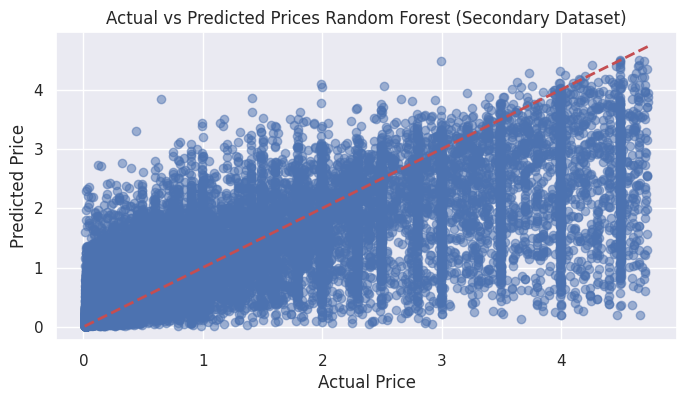

In [49]:

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


# Visualize actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices Random Forest (Secondary Dataset)')
plt.show()


Mean Squared Error: 1.4471578909096415e-13
R-squared: 0.9999999999643058
             feature    importance
4    edhrecSaltiness  1.000000e+00
9           manaCost  3.874254e-09
3         edhrecRank  9.068164e-10
10         manaValue  9.032324e-10
11              name  8.535218e-10
21              type  5.706776e-10
22             types  4.802382e-10
2             colors  4.437794e-10
0             artist  3.695733e-10
13      originalType  3.214942e-10
17            rarity  1.791454e-10
20         toughness  1.755881e-10
19        supertypes  1.511267e-10
14             power  1.510587e-10
12            number  3.133510e-11
18           setCode  3.102427e-11
5   gameAvailability  8.727007e-12
8             layout  5.906089e-12
6          isReprint  2.962961e-12
15     priceProvider  2.027806e-12
1         cardFinish  1.565508e-12
16   providerListing  4.630754e-13
7           language  3.300786e-13


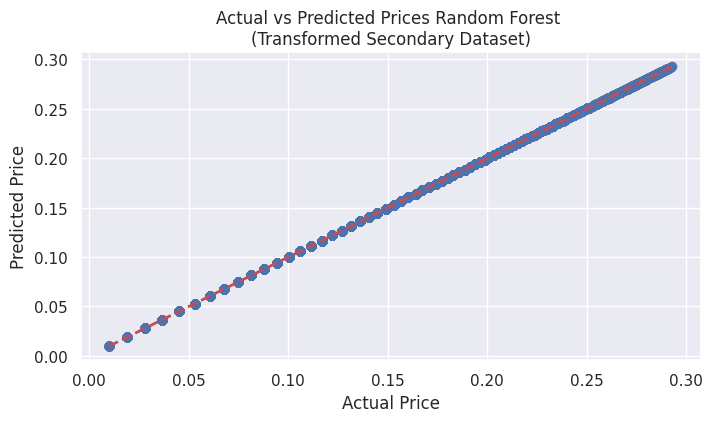

In [50]:

# Make predictions
y_predt = rft.predict(X_test_scaledt)

# Calculate metrics
mset = mean_squared_error(y_testt, y_predt)
r2t = r2_score(y_testt, y_predt)

print(f'Mean Squared Error: {mset}')
print(f'R-squared: {r2t}')

# Feature importance
feature_importancet = pd.DataFrame({'feature': Xt.columns, 'importance': rft.feature_importances_})
feature_importancet = feature_importancet.sort_values('importance', ascending=False)
print(feature_importancet)


# Visualize actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_testt, y_predt, alpha=0.5)
plt.plot([y_testt.min(), y_testt.max()], [y_testt.min(), y_testt.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices Random Forest \n(Transformed Secondary Dataset)')
plt.show()